In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload files manually in Google Colab
from google.colab import files
uploaded = files.upload()

# Load datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

Saving matches.csv to matches.csv
Saving deliveries.csv to deliveries.csv


In [3]:
# Display first few rows
print("\nMatches Data:")
print(matches.head())

print("\nDeliveries Data:")
print(deliveries.head())


Matches Data:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers

In [4]:
# Check for missing values
print("\nMissing Values in Matches Dataset:")
print(matches.isnull().sum())

print("\nMissing Values in Deliveries Dataset:")
print(deliveries.isnull().sum())


Missing Values in Matches Dataset:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

Missing Values in Deliveries Dataset:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismi

In [5]:
# Describe numerical features
print("\nSummary Statistics - Matches:")
print(matches.describe())

print("\nSummary Statistics - Deliveries:")
print(deliveries.describe())


Summary Statistics - Matches:
               id       season  dl_applied  win_by_runs  win_by_wickets  \
count  636.000000   636.000000  636.000000   636.000000      636.000000   
mean   318.500000  2012.490566    0.025157    13.682390        3.372642   
std    183.741666     2.773026    0.156726    23.908877        3.420338   
min      1.000000  2008.000000    0.000000     0.000000        0.000000   
25%    159.750000  2010.000000    0.000000     0.000000        0.000000   
50%    318.500000  2012.000000    0.000000     0.000000        4.000000   
75%    477.250000  2015.000000    0.000000    20.000000        7.000000   
max    636.000000  2017.000000    1.000000   146.000000       10.000000   

       umpire3  
count      0.0  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN  

Summary Statistics - Deliveries:
            match_id         inning           over           ball  \
count  150460.000000  150460.000000  

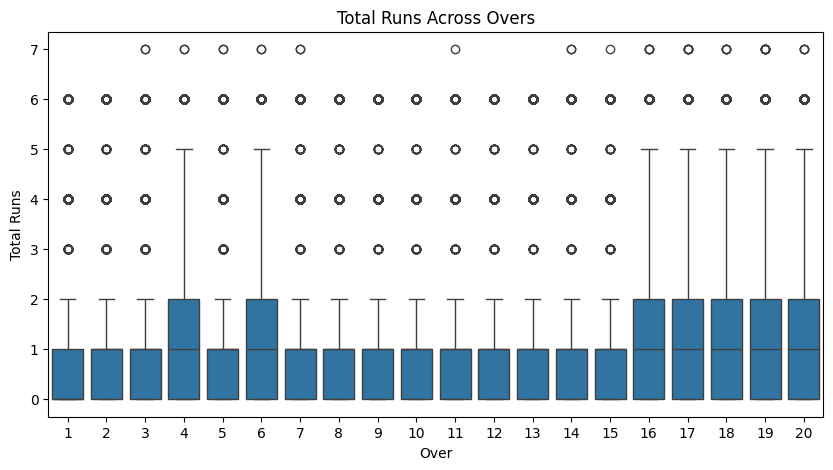

In [6]:
# -----------------------------------------
# Question 1: Distribution of Total Runs Across Overs
# -----------------------------------------
plt.figure(figsize=(10,5))
sns.boxplot(x="over", y="total_runs", data=deliveries)
plt.title("Total Runs Across Overs")
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.show()

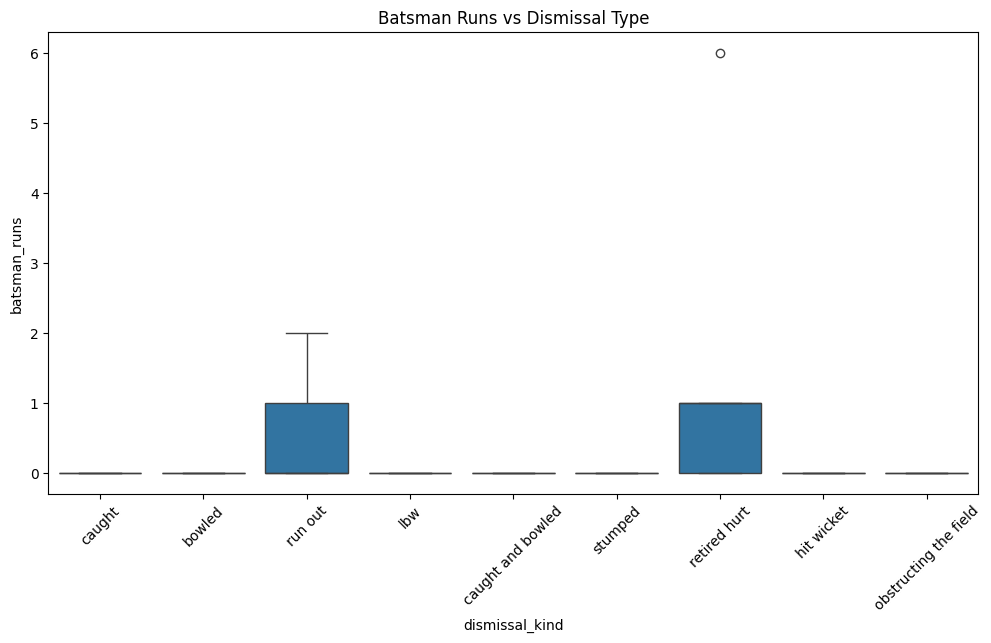

In [7]:
# -----------------------------------------
# Question 2: Relationship between Batsman Runs and Dismissal Type
# -----------------------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x="dismissal_kind", y="batsman_runs", data=deliveries)
plt.xticks(rotation=45)
plt.title("Batsman Runs vs Dismissal Type")
plt.show()

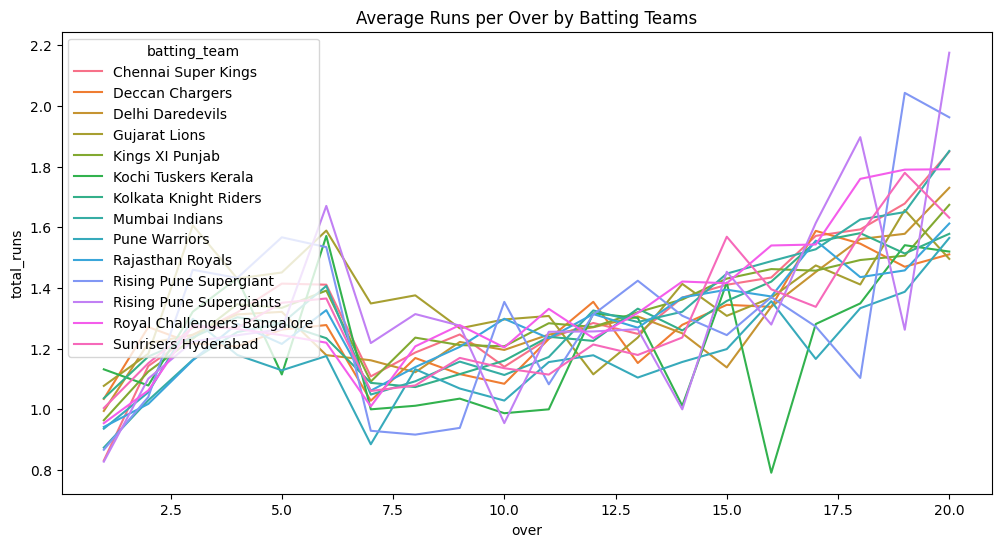

In [8]:
# -----------------------------------------
# Question 3: Average Runs per Over by Batting Teams
# -----------------------------------------
team_runs = deliveries.groupby(['batting_team', 'over'])['total_runs'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x="over", y="total_runs", hue="batting_team", data=team_runs)
plt.title("Average Runs per Over by Batting Teams")
plt.show()

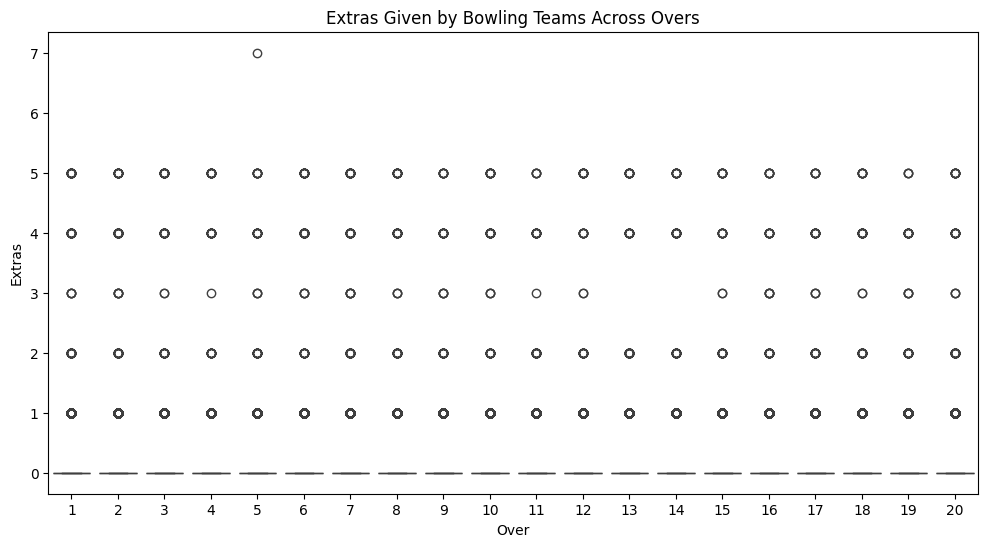

In [9]:
# -----------------------------------------
# Question 4: Distribution of Extras by Bowling Teams Across Overs
# -----------------------------------------
plt.figure(figsize=(12,6))
sns.boxplot(x="over", y="extra_runs", data=deliveries)
plt.title("Extras Given by Bowling Teams Across Overs")
plt.xlabel("Over")
plt.ylabel("Extras")
plt.show()

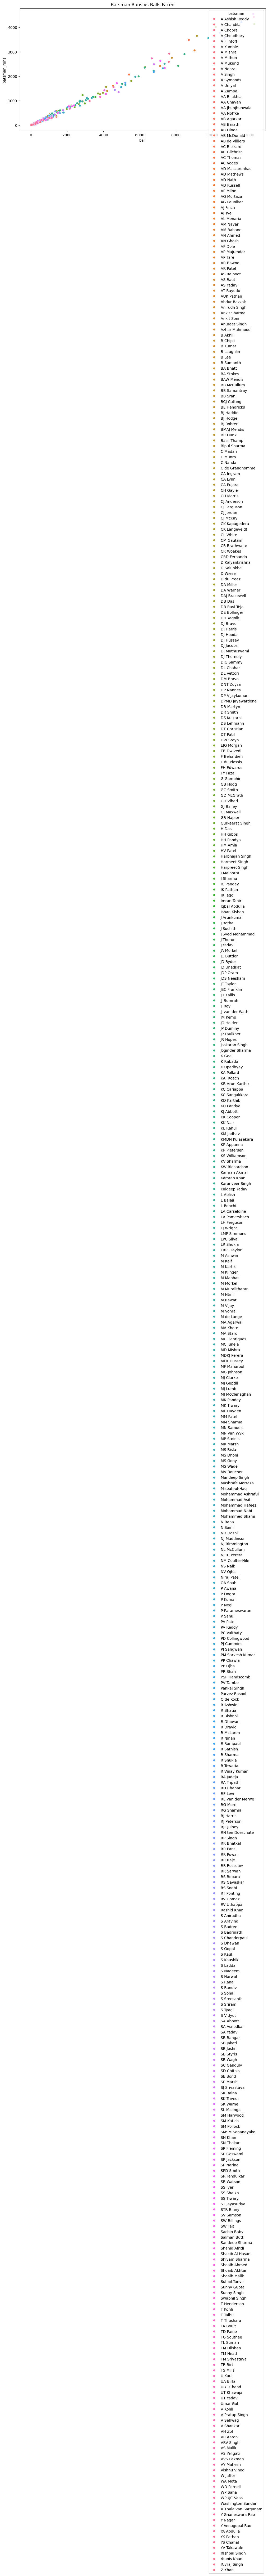

In [10]:
# -----------------------------------------
# Question 5: Batsman Runs vs Balls Faced
# -----------------------------------------
batsman_stats = deliveries.groupby(['batsman'])[['batsman_runs', 'ball']].sum().reset_index()
batsman_stats["strike_rate"] = (batsman_stats["batsman_runs"] / batsman_stats["ball"]) * 100
plt.figure(figsize=(12,6))
sns.scatterplot(x="ball", y="batsman_runs", hue="batsman", data=batsman_stats)
plt.title("Batsman Runs vs Balls Faced")
plt.show()

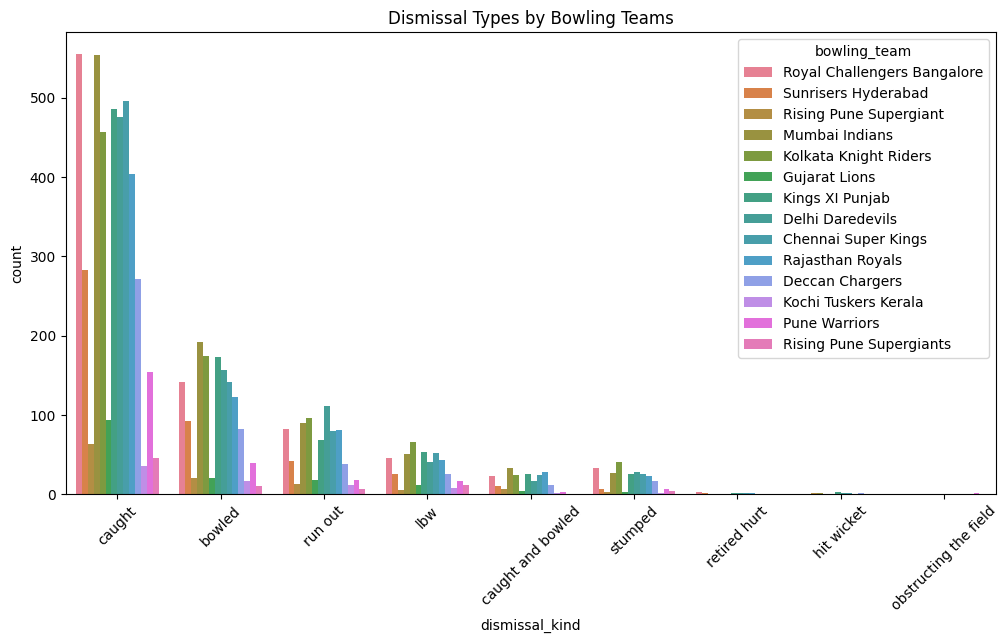

In [11]:
# -----------------------------------------
# Question 6: Dismissal Types Across Bowling Teams
# -----------------------------------------
plt.figure(figsize=(12,6))
sns.countplot(x="dismissal_kind", hue="bowling_team", data=deliveries)
plt.xticks(rotation=45)
plt.title("Dismissal Types by Bowling Teams")
plt.show()

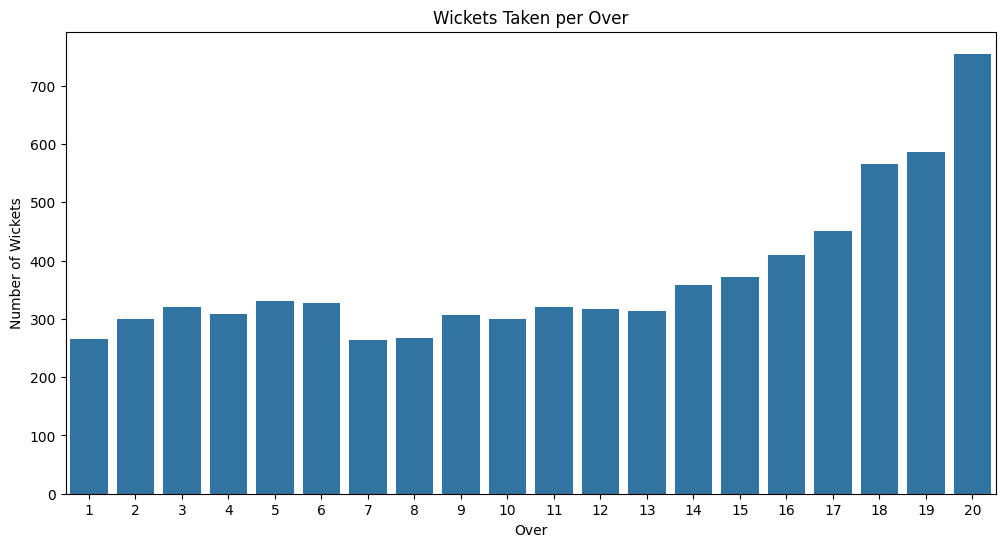

In [12]:
# -----------------------------------------
# Question 7: Wickets Taken per Over
# -----------------------------------------
wickets_per_over = deliveries[deliveries['player_dismissed'].notna()].groupby("over").size().reset_index(name="wickets")
plt.figure(figsize=(12,6))
sns.barplot(x="over", y="wickets", data=wickets_per_over)
plt.title("Wickets Taken per Over")
plt.xlabel("Over")
plt.ylabel("Number of Wickets")
plt.show()

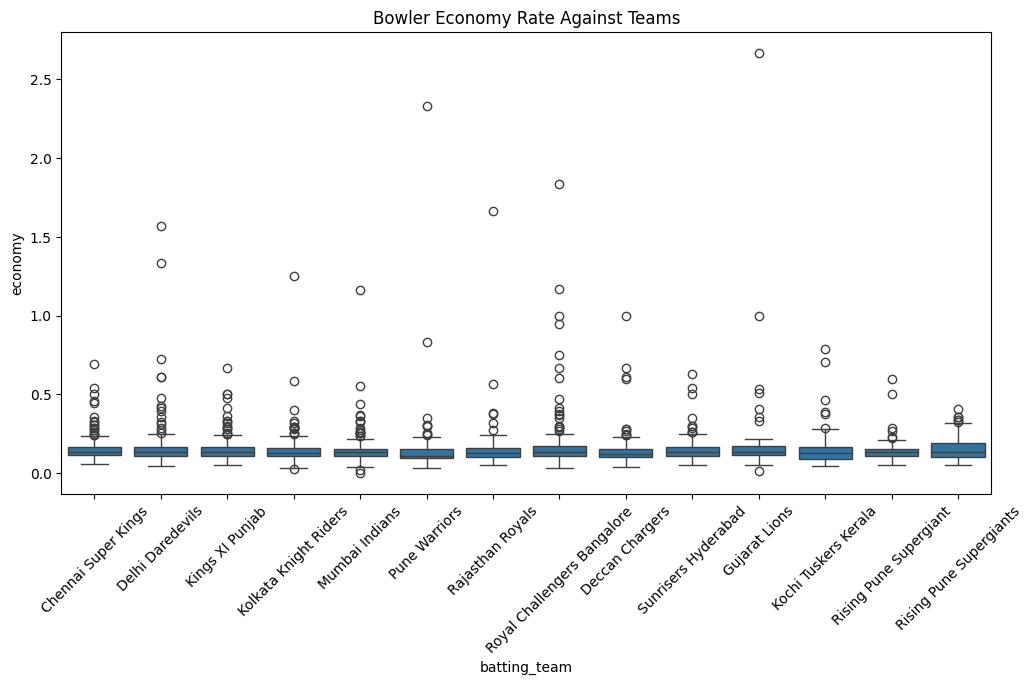

In [13]:
# -----------------------------------------
# Question 8: Bowler Economy Rate Against Batting Teams
# -----------------------------------------
bowler_stats = deliveries.groupby(["bowler", "batting_team"])[["total_runs", "over"]].sum().reset_index()
bowler_stats["economy"] = bowler_stats["total_runs"] / bowler_stats["over"]
plt.figure(figsize=(12,6))
sns.boxplot(x="batting_team", y="economy", data=bowler_stats)
plt.xticks(rotation=45)
plt.title("Bowler Economy Rate Against Teams")
plt.show()

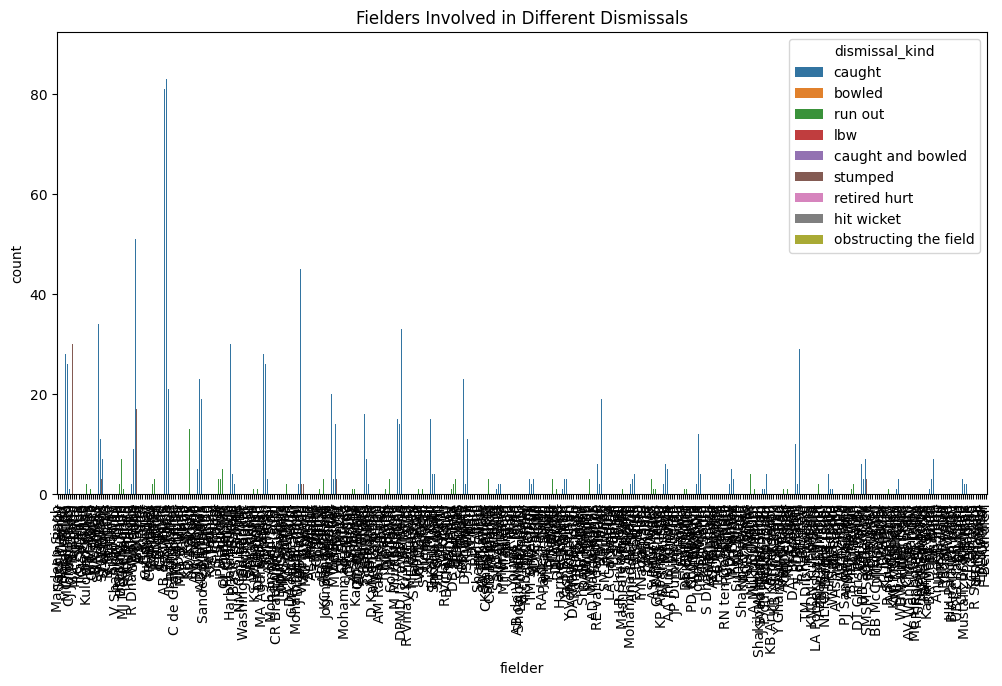

In [14]:
# -----------------------------------------
# Question 9: Fielders & Dismissals
# -----------------------------------------
plt.figure(figsize=(12,6))
sns.countplot(x="fielder", hue="dismissal_kind", data=deliveries)
plt.xticks(rotation=90)
plt.title("Fielders Involved in Different Dismissals")
plt.show()

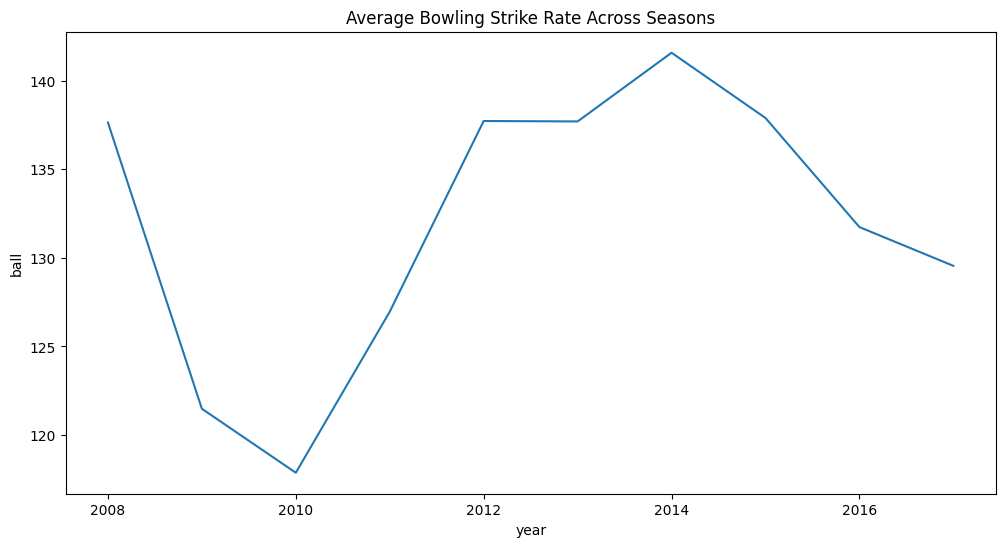

In [15]:
# -----------------------------------------
# Question 10: Bowling Strike Rate Over Seasons
# -----------------------------------------
deliveries["year"] = deliveries["match_id"].map(matches.set_index("id")["season"])
bowler_stats = deliveries.groupby(["year", "bowler"])["ball"].count().reset_index()
bowler_stats = bowler_stats.groupby("year")["ball"].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="ball", data=bowler_stats)
plt.title("Average Bowling Strike Rate Across Seasons")
plt.show()

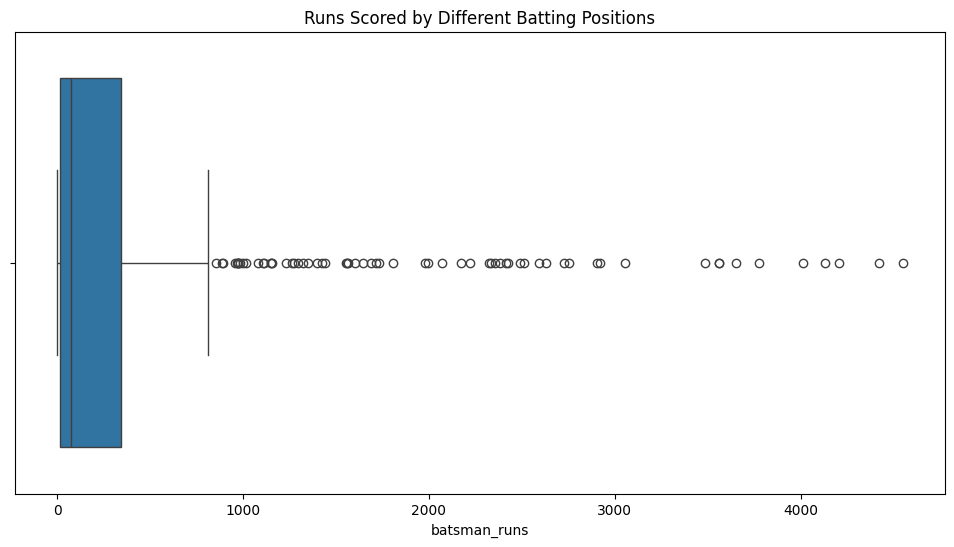

In [16]:
# -----------------------------------------
# Question 11: Runs by Batting Positions
# -----------------------------------------
batting_positions = deliveries.groupby("batsman")["batsman_runs"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.boxplot(x="batsman_runs", data=batting_positions)
plt.title("Runs Scored by Different Batting Positions")
plt.show()

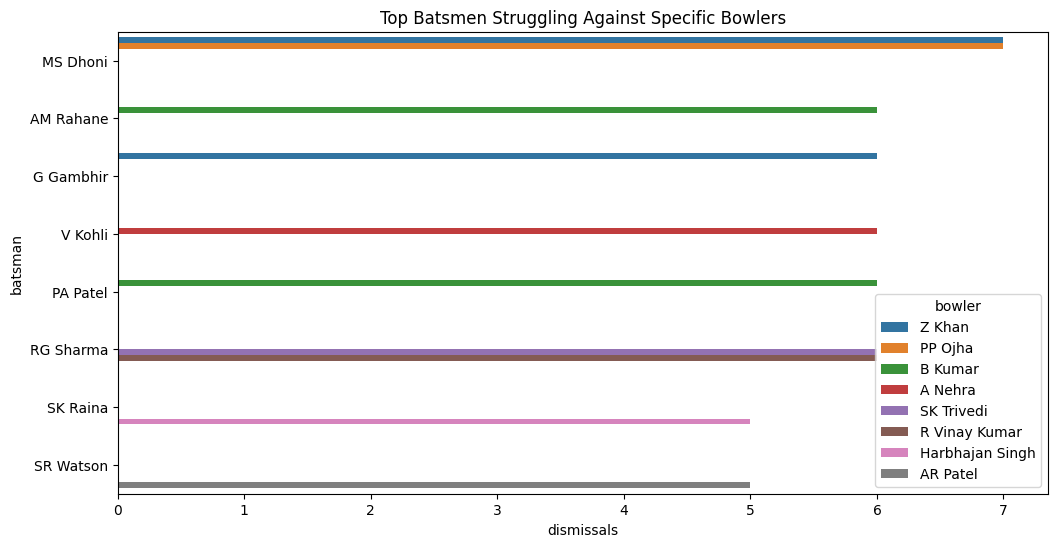

In [17]:
# -----------------------------------------
# Question 12: Batsman vs Bowler Dismissals
# -----------------------------------------
dismissals = deliveries[deliveries["dismissal_kind"].notna()]
batsman_bowler = dismissals.groupby(["batsman", "bowler"]).size().reset_index(name="dismissals")
top_batsmen_bowlers = batsman_bowler.sort_values("dismissals", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y="batsman", x="dismissals", hue="bowler", data=top_batsmen_bowlers)
plt.title("Top Batsmen Struggling Against Specific Bowlers")
plt.show()

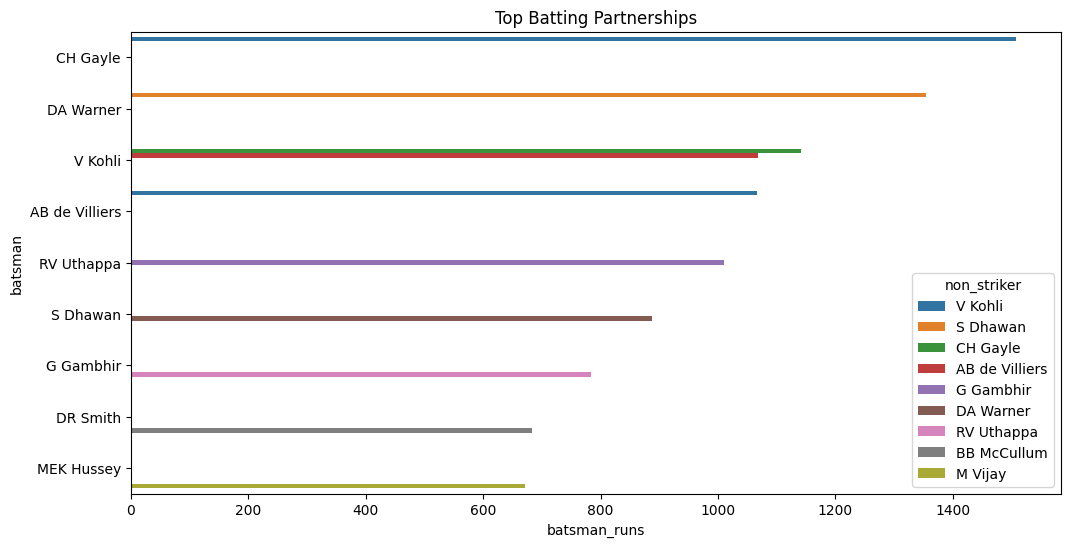

In [18]:
# -----------------------------------------
# Question 13: Successful Batting Partnerships
# -----------------------------------------
partnerships = deliveries.groupby(["batsman", "non_striker"])["batsman_runs"].sum().reset_index()
top_partnerships = partnerships.sort_values("batsman_runs", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y="batsman", x="batsman_runs", hue="non_striker", data=top_partnerships)
plt.title("Top Batting Partnerships")
plt.show()


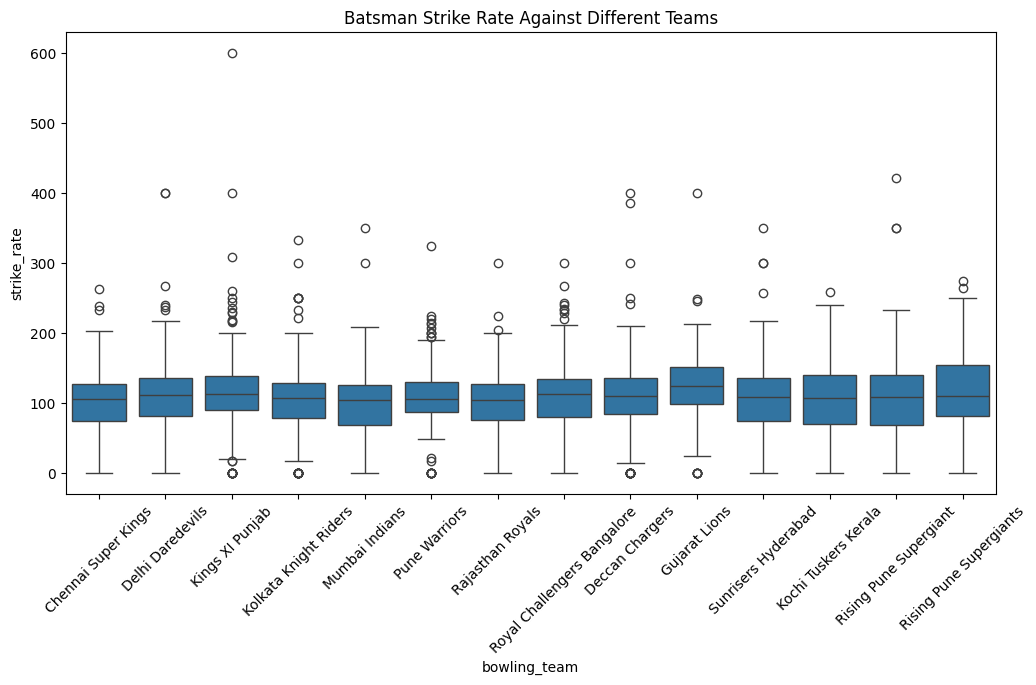

In [19]:
# -----------------------------------------
# Question 14: Batsman Strike Rate Against Teams
# -----------------------------------------
strike_rates = deliveries.groupby(["batsman", "bowling_team"])["batsman_runs"].sum().reset_index()
strike_rates["balls_faced"] = deliveries.groupby(["batsman", "bowling_team"])["ball"].count().reset_index()["ball"]
strike_rates["strike_rate"] = (strike_rates["batsman_runs"] / strike_rates["balls_faced"]) * 100

plt.figure(figsize=(12,6))
sns.boxplot(x="bowling_team", y="strike_rate", data=strike_rates)
plt.xticks(rotation=45)
plt.title("Batsman Strike Rate Against Different Teams")
plt.show()


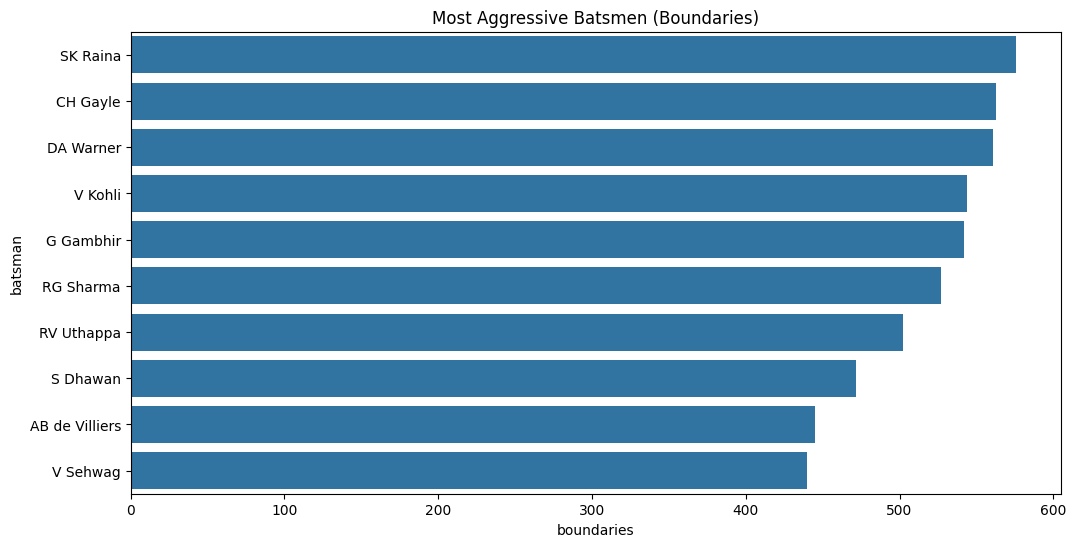

In [20]:
# -----------------------------------------
# Question 15: Boundary Frequency
# -----------------------------------------
boundaries = deliveries[(deliveries["batsman_runs"] == 4) | (deliveries["batsman_runs"] == 6)]
boundary_counts = boundaries.groupby("batsman").size().reset_index(name="boundaries")
top_boundaries = boundary_counts.sort_values("boundaries", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y="batsman", x="boundaries", data=top_boundaries)
plt.title("Most Aggressive Batsmen (Boundaries)")
plt.show()

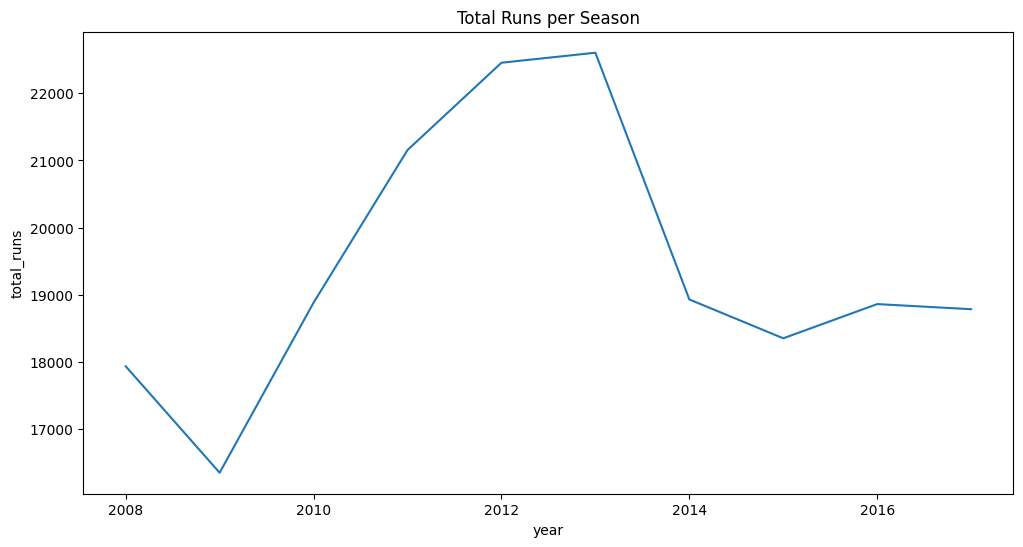

In [22]:
# -----------------------------------------
# Question 16: Total Runs Per Season
# -----------------------------------------
matches["year"] = matches["season"]
runs_per_season = deliveries.groupby(deliveries["match_id"].map(matches.set_index("id")["year"]))["total_runs"].sum().reset_index()
runs_per_season.columns = ['year', 'total_runs']

plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="total_runs", data=runs_per_season)
plt.title("Total Runs per Season")
plt.show()

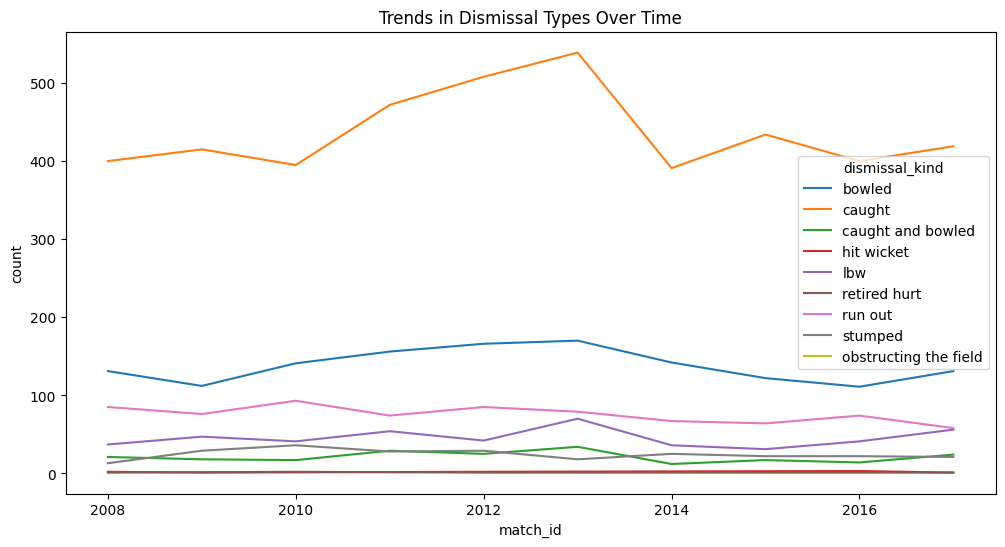

In [23]:
# -----------------------------------------
# Question 17: Trends in Dismissals Over Time
# -----------------------------------------
dismissal_trends = deliveries.groupby([deliveries["match_id"].map(matches.set_index("id")["year"]), "dismissal_kind"]).size().reset_index(name="count")
plt.figure(figsize=(12,6))
sns.lineplot(x="match_id", y="count", hue="dismissal_kind", data=dismissal_trends)
plt.title("Trends in Dismissal Types Over Time")
plt.show()

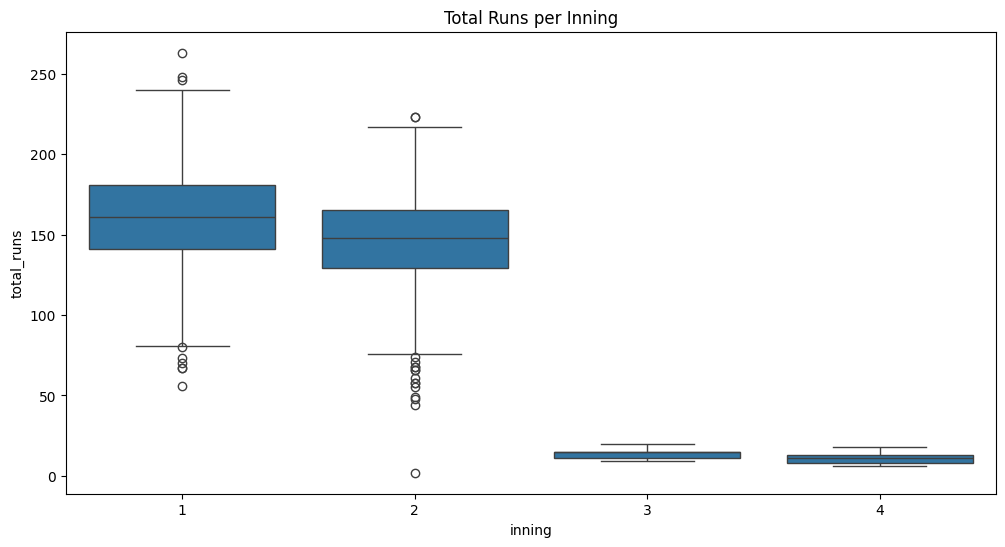

In [24]:
# -----------------------------------------
# Question 18: Impact of Innings on Total Runs
# -----------------------------------------
innings_runs = deliveries.groupby(["match_id", "inning"])["total_runs"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.boxplot(x="inning", y="total_runs", data=innings_runs)
plt.title("Total Runs per Inning")
plt.show()

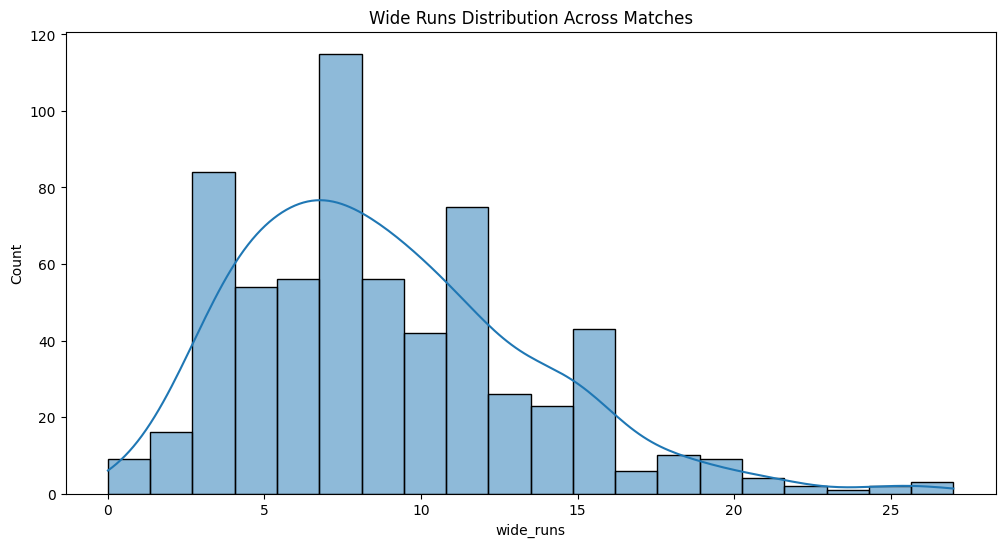

In [25]:
# -----------------------------------------
# Question 19: Wide Runs per Match
# -----------------------------------------
wide_runs = deliveries.groupby("match_id")["wide_runs"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.histplot(wide_runs["wide_runs"], bins=20, kde=True)
plt.title("Wide Runs Distribution Across Matches")
plt.show()

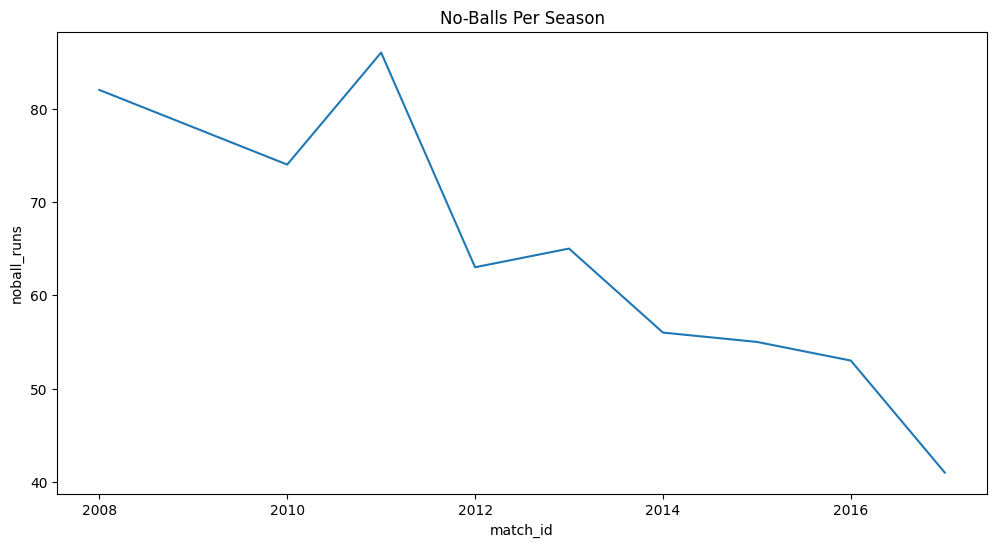

In [26]:
# -----------------------------------------
# Question 20: No-Balls Per Season
# -----------------------------------------
noball_trends = deliveries.groupby(deliveries["match_id"].map(matches.set_index("id")["year"]))["noball_runs"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="match_id", y="noball_runs", data=noball_trends)
plt.title("No-Balls Per Season")
plt.show()